<a href="https://colab.research.google.com/github/OksanaSitalova/Sales-Analysis-by-Product-Trends-Geography-and-ABC-Results/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data overview

In [5]:
# connect libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

# read files from Google Drive
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/PYTHON/Final_project

events_df = pd.read_csv("events.csv")
countries_df = pd.read_csv("countries.csv")
products_df = pd.read_csv("products.csv")

# Preview - events_df
events_df.info()
events_df.head()

Mounted at /content/drive
/content/drive/MyDrive/PYTHON/Final_project
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


 events_df - contains 1330 rows and 10 columns.

column description:

Order ID - order identifier,
 Order Date - order date,
 Delivery Date - delivery date,
 Order Priority - order selection,
 Country Code - country code,
 Product ID - product identifier,
 Sales channel - online or offline sales,
 Units sold - number of products sold,
 Unit price - product price,
 Unit cost - product cost

 We see that all numeric columns are recognized as numeric. The order_date and Ship Date columns have the wrong data type. We also have missing values ​​in the Country Code column.

In [6]:
# Preview - countries_df
countries_df.info()
countries_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


 countries_df - contains 249 rows and 5 columns.

 column description:

 name - country name,
 alpha-2 - country code,
 alpha-3 - country code,
 region - continent,
 sub-region - part of the world

 We see that the alpha-2, region, and sub-region columns each have one missing value.

In [7]:
# Preview - products_df
products_df.info()
products_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


products_df - contains 12 rows and 2 columns

column description:

id - category identifier,
 item_type - product category

There are no missing values, the data is of the appropriate type

Table events_df has a common column with table products_df, these are "Product ID" and "id" respectively.

Table events_df has a common column with table countries_df, these are "Country Code" and "alpha-3" respectively

# Data cleaning

Checking and handling missing values

In [8]:
# change all column names to the type snake_case
events_df.columns = (events_df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_"))
countries_df.columns = (countries_df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_"))

In [9]:
# % missing values ​​in columns in events_df
events_df.isna().sum() / events_df.shape[0] * 100


,0
order_id,0.000000
order_date,0.000000
ship_date,0.000000
order_priority,0.000000
country_code,6.165414
product_id,0.000000
sales_channel,0.000000
units_sold,0.150376
unit_price,0.000000
unit_cost,0.000000


We have missing values ​​in column "country_code" (6.2%) - the missing data does not give us information only about the country, but does not affect the calculation of all other indicators, so we will leave these rows.


There is also missing data in the column "units_sold" (0.15%), which we will remove as insignificant.



In [10]:
# delete rows with empty values ​​in the column "units_sold" and check the result
events_df.dropna(subset=["units_sold"], inplace=True)
events_df.isna().sum() / events_df.shape[0] * 100

,0
order_id,0.000000
order_date,0.000000
ship_date,0.000000
order_priority,0.000000
country_code,6.174699
product_id,0.000000
sales_channel,0.000000
units_sold,0.000000
unit_price,0.000000
unit_cost,0.000000


In [11]:
# % missing values ​​in columns in countries_df
countries_df.isna().sum() / countries_df.shape[0] * 100

,0
name,0.000000
alpha_2,0.401606
alpha_3,0.000000
region,0.401606
sub_region,0.401606


The percentage of missing values ​​is very small, so we can delete these rows.

In [12]:
# delete rows with empty values ​​in the columns and check the result
countries_df.dropna(inplace=True)
countries_df.isna().sum() / countries_df.shape[0] * 100

,0
name,0.0
alpha_2,0.0
alpha_3,0.0
region,0.0
sub_region,0.0


Conversion of data types

In [13]:
# Convert to datetime
events_df["order_date"] = pd.to_datetime(events_df["order_date"], format="%m/%d/%Y")
events_df["ship_date"] = pd.to_datetime(events_df["ship_date"], format="%m/%d/%Y")

# overview of data from the DataFrame events_df
events_df.info()
events_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1328 non-null   int64         
 1   order_date      1328 non-null   datetime64[ns]
 2   ship_date       1328 non-null   datetime64[ns]
 3   order_priority  1328 non-null   object        
 4   country_code    1246 non-null   object        
 5   product_id      1328 non-null   int64         
 6   sales_channel   1328 non-null   object        
 7   units_sold      1328 non-null   float64       
 8   unit_price      1328 non-null   float64       
 9   unit_cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB


,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,2014-07-18,2014-08-11,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79


Checking date frames for duplicates
and other anomalies

In [14]:
events_dupl = events_df.duplicated().sum()
print(f"Number of duplicates in DataFrame - events: {events_dupl}")

# checking categorical data for uniqueness and extra spaces
events_df["order_priority"] = events_df["order_priority"].str.replace(r'\s+', ' ', regex=True).str.strip()
events_df["country_code"] = events_df["country_code"].str.replace(r'\s+', ' ', regex=True).str.strip()
events_df["sales_channel"] = events_df["sales_channel"].str.replace(r'\s+', ' ', regex=True).str.strip().str.capitalize()

# checking if all dates in order_date are before or equal to ship_date
is_valid = (events_df["order_date"] <= events_df["ship_date"]).all()
print("All order_dates are before or equal to ship_date:", is_valid)

# checking that all values ​​in the units_sold, unit_price, and unit_cost columns are positive
are_positive = (events_df[["units_sold", "unit_price", "unit_cost"]] > 0).all()

print("Are all values ​​positive?")
print(are_positive)

Number of duplicates in DataFrame - events: 0
All order_dates are before or equal to ship_date: True
Are all values ​​positive?
units_sold    True
unit_price    True
unit_cost     True
dtype: bool


In [15]:
countries_dupl = countries_df.duplicated().sum()
print(f"Number of duplicates in DataFrame - countries: {countries_dupl}")

# checking categorical data for uniqueness and extra spaces
countries_df["name"] = countries_df["name"].str.replace(r'\s+', ' ', regex=True).str.strip()
countries_df["name"] = countries_df["name"].replace("Russia", "russia")
countries_df["region"] = countries_df["region"].str.replace(r'\s+', ' ', regex=True).str.strip()
countries_df["sub_region"] = countries_df["sub_region"].str.replace(r'\s+', ' ', regex=True).str.strip()
countries_df["sub_region"] = countries_df["sub_region"].str.replace(r'\s+', ' ', regex=True).str.strip()
countries_df["alpha_2"] = countries_df["alpha_2"].str.replace(r'\s+', ' ', regex=True).str.strip()

Number of duplicates in DataFrame - countries: 0


In [16]:
products_dupl = products_df.duplicated().sum()
print(f"Number of duplicates in DataFrame - products: {products_dupl}")

Number of duplicates in DataFrame - products: 0


Examination for abnormalities

In [17]:
events_df[["units_sold", "unit_price", "unit_cost"]].describe().round(2)

,units_sold,unit_price,unit_cost
count,1328.00,1328.00,1328.00
mean,4952.20,264.91,187.21
std,2905.20,217.39,176.19
min,2.00,9.33,6.92
25%,2356.75,81.73,35.84
50%,4962.00,154.06,97.44
75%,7459.50,437.20,263.33
max,9999.00,668.27,524.96


A large discrepancy was found between the median and the mean in the "unit_price" and "unit_cost" columns, but this can be explained by the presence of a small group of high-priced products, which increases our average.

# Combining data

In [18]:
# change the column name in countries_df from "alpha_3" to "country_code" and products_df from "id" to "product_id"
countries_df = countries_df.rename(columns={"alpha_3": "country_code", "name": "country_name"})
products_df = products_df.rename(columns={"id": "product_id", "item_type": "category"})


In [19]:
# combine 3 dataframes into one
events_with_country = events_df.merge(countries_df, on="country_code", how="left").merge(products_df, on="product_id")
events_with_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1328 non-null   int64         
 1   order_date      1328 non-null   datetime64[ns]
 2   ship_date       1328 non-null   datetime64[ns]
 3   order_priority  1328 non-null   object        
 4   country_code    1246 non-null   object        
 5   product_id      1328 non-null   int64         
 6   sales_channel   1328 non-null   object        
 7   units_sold      1328 non-null   float64       
 8   unit_price      1328 non-null   float64       
 9   unit_cost       1328 non-null   float64       
 10  country_name    1246 non-null   object        
 11  alpha_2         1246 non-null   object        
 12  region          1246 non-null   object        
 13  sub_region      1246 non-null   object        
 14  category        1328 non-null   object        
dtypes: d

In [20]:
# remove extra columns
events_with_country = events_with_country.drop(columns=["country_code", "alpha_2"])
events_with_country.head()

,order_id,order_date,ship_date,order_priority,product_id,sales_channel,units_sold,unit_price,unit_cost,country_name,region,sub_region,category
0,100640618,2014-10-08,2014-10-18,M,2103,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,2103,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,101025998,2014-07-18,2014-08-11,M,7940,Online,4693.0,668.27,502.54,NaN,NaN,NaN,Household
3,102230632,2017-05-13,2017-06-13,L,2455,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
4,103435266,2012-08-11,2012-09-18,H,1270,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages


In [21]:
# add columns with new calculations
events_with_country["revenue"] = events_with_country["units_sold"] * events_with_country["unit_price"]
events_with_country["total_cost"] = events_with_country["units_sold"] * events_with_country["unit_cost"]
events_with_country["profit"] = events_with_country["revenue"] - events_with_country["total_cost"]
events_with_country['delivery_days'] = (events_with_country['ship_date'] - events_with_country['order_date']).dt.days
events_with_country['order_month'] = events_with_country['order_date'].dt.to_period('M').astype(str)
events_with_country.tail()

,order_id,order_date,ship_date,order_priority,product_id,sales_channel,units_sold,unit_price,unit_cost,country_name,region,sub_region,category,revenue,total_cost,profit,delivery_days,order_month
1323,994504153,2017-01-10,2017-01-13,M,4594,Online,4734.0,9.33,6.92,Sweden,Europe,Northern Europe,Fruits,44168.22,32759.28,11408.94,3,2017-01
1324,994978797,2014-12-05,2015-01-02,H,1270,Offline,5192.0,47.45,31.79,Italy,Europe,Southern Europe,Beverages,246360.40,165053.68,81306.72,28,2014-12
1325,996754205,2010-09-20,2010-09-22,L,7331,Offline,574.0,255.28,159.42,russia,Europe,Eastern Europe,Baby Food,146530.72,91507.08,55023.64,2,2010-09
1326,998043382,2010-06-15,2010-07-03,H,8293,Online,2070.0,437.20,263.33,Malta,Europe,Southern Europe,Cosmetics,905004.00,545093.10,359910.90,18,2010-06
1327,999879729,2012-03-31,2012-05-06,M,7940,Offline,5486.0,668.27,502.54,Albania,Europe,Southern Europe,Household,3666129.22,2756934.44,909194.78,36,2012-03


The following columns have been added to the data frame: "revenue" - revenue from selling a specified number of units of product at a specified price per unit; "total_cost" - costs for a specified number of units of product, taking into account costs per unit; "profit" - profit from sales (the difference between revenue and costs), "delivery_days" - the difference between the order date and delivery, "order_month" - shows the month and year of the order.

In [22]:
# replacing NaN with "unknown"
events_with_country = events_with_country.fillna("unknown")
events_with_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1328 non-null   int64         
 1   order_date      1328 non-null   datetime64[ns]
 2   ship_date       1328 non-null   datetime64[ns]
 3   order_priority  1328 non-null   object        
 4   product_id      1328 non-null   int64         
 5   sales_channel   1328 non-null   object        
 6   units_sold      1328 non-null   float64       
 7   unit_price      1328 non-null   float64       
 8   unit_cost       1328 non-null   float64       
 9   country_name    1328 non-null   object        
 10  region          1328 non-null   object        
 11  sub_region      1328 non-null   object        
 12  category        1328 non-null   object        
 13  revenue         1328 non-null   float64       
 14  total_cost      1328 non-null   float64       
 15  prof

# Data analysis and visualization

## Basic analysis and metrics

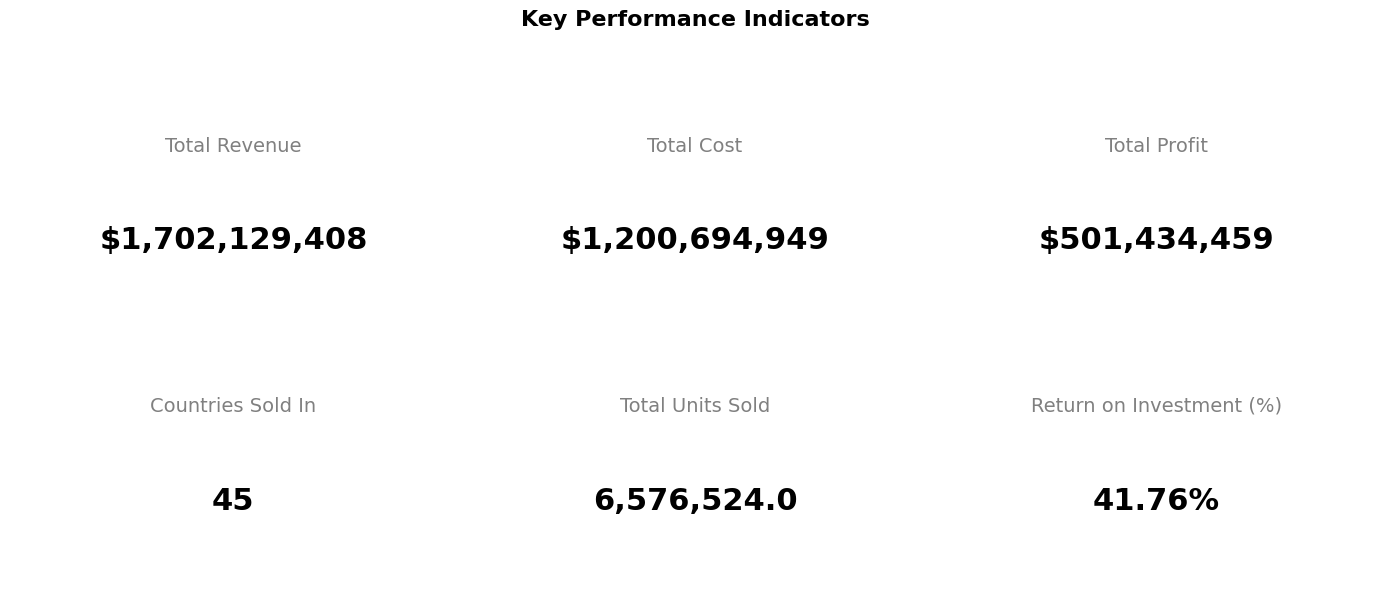

In [23]:

# Calculate metrics
total_revenue = events_with_country["revenue"].sum()
total_cost = events_with_country["total_cost"].sum()
total_profit = events_with_country["profit"].sum()
total_country = events_with_country.loc[events_with_country["country_name"] != "unknown", "country_name"].nunique()
total_units_sold = events_with_country["units_sold"].sum()
return_on_investment = ((total_revenue - total_cost) / total_cost * 100).round(2)

# Create 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 6))

# KPI 1 – Total Revenue
axes[0, 0].text(0.5, 0.7, "Total Revenue", fontsize=14, color="gray", ha='center')
axes[0, 0].text(0.5, 0.3, f"${total_revenue:,.0f}", fontsize=22, weight='bold', ha='center')
axes[0, 0].axis('off')

# KPI 2 – Total Cost
axes[0, 1].text(0.5, 0.7, "Total Cost", fontsize=14, color="gray", ha='center')
axes[0, 1].text(0.5, 0.3, f"${total_cost:,.0f}", fontsize=22, weight='bold', ha='center')
axes[0, 1].axis('off')

# KPI 3 – Total Profit
axes[0, 2].text(0.5, 0.7, "Total Profit", fontsize=14, color="gray", ha='center')
axes[0, 2].text(0.5, 0.3, f"${total_profit:,.0f}", fontsize=22, weight='bold', ha='center')
axes[0, 2].axis('off')

# KPI 4 – Countries Sold In
axes[1, 0].text(0.5, 0.7, "Countries Sold In", fontsize=14, color="gray", ha='center')
axes[1, 0].text(0.5, 0.3, f"{total_country:,}", fontsize=22, weight='bold', ha='center')
axes[1, 0].axis('off')

# KPI 5 – Total Units Sold
axes[1, 1].text(0.5, 0.7, "Total Units Sold", fontsize=14, color="gray", ha='center')
axes[1, 1].text(0.5, 0.3, f"{total_units_sold:,}", fontsize=22, weight='bold', ha='center')
axes[1, 1].axis('off')

# KPI 6 – ROI
axes[1, 2].text(0.5, 0.7, "Return on Investment (%)", fontsize=14, color="gray", ha='center')
axes[1, 2].text(0.5, 0.3, f"{return_on_investment:.2f}%", fontsize=22, weight='bold', ha='center')
axes[1, 2].axis('off')

# Final layout
plt.suptitle("Key Performance Indicators", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Сalculations by category

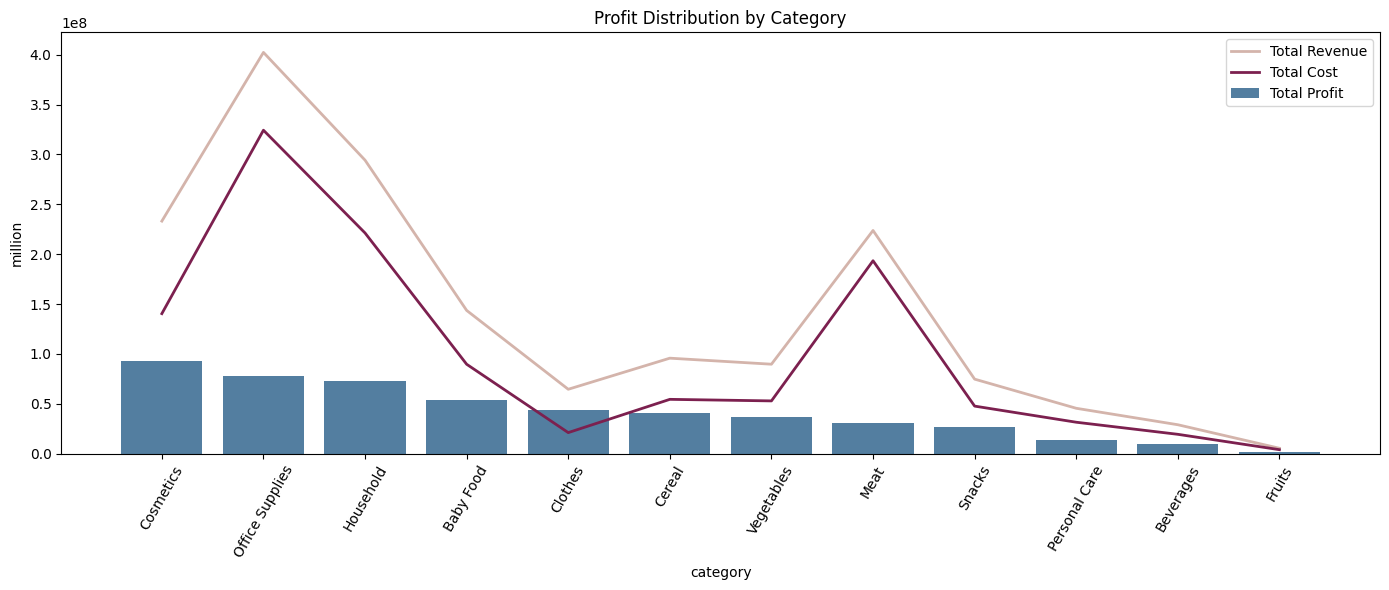

In [24]:
# Group by category and sort by profit
summary = (events_with_country.groupby('category')[['revenue', 'total_cost', 'profit']].sum().sort_values(by='profit', ascending=False).reset_index())

# Create the figure
plt.figure(figsize=(14, 6))

# Bars – profit
sns.barplot(x='category', y='profit', data=summary, color='#4680AD', label='Total Profit')

# Line – revenue
plt.plot(summary['category'], summary['revenue'], color='#d4b4ab', linewidth=2, label='Total Revenue')

# Line – total cost
plt.plot(summary['category'], summary['total_cost'], color='#7C204F', linewidth=2, label='Total Cost')

# Formatting
plt.xticks(rotation=60)
plt.ylabel("million")
plt.title("Profit Distribution by Category")
plt.legend()
plt.tight_layout()
plt.show()

This graph shows the distribution of revenue, expenses and profit by category. It can be noted that categories such as "Meat" and "Office supplies" have low margins, while the highest margin is in the "Clothes" category.

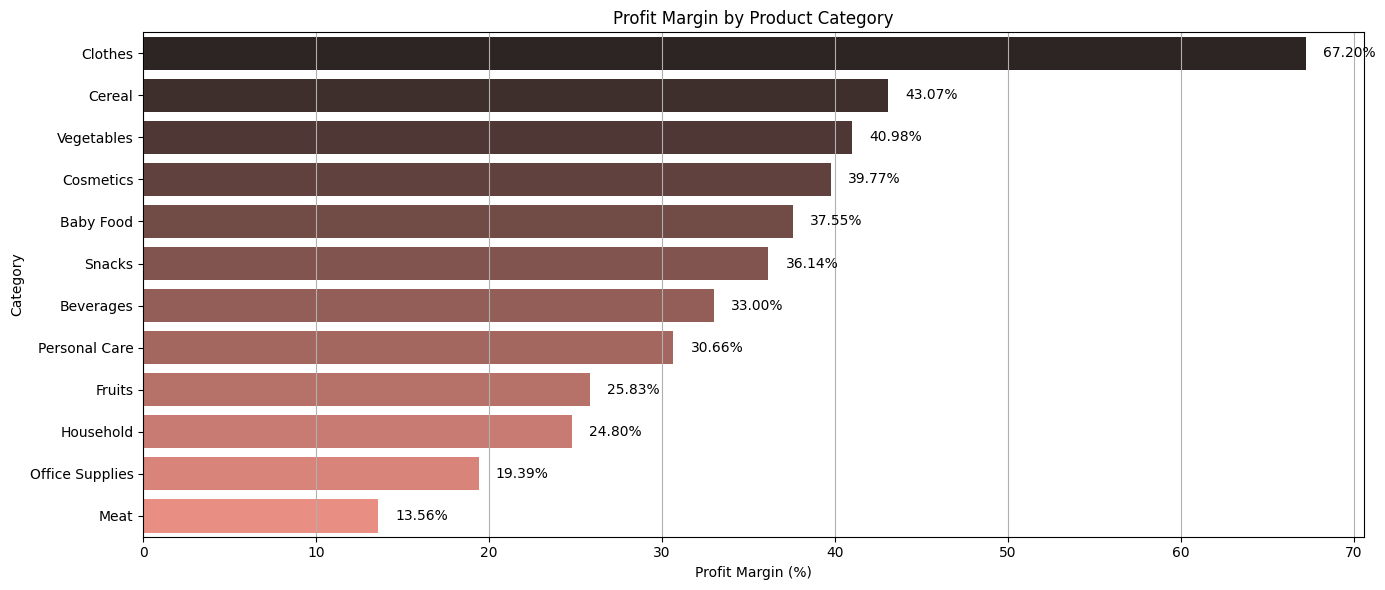

In [25]:
# Group and aggregate
summary = (events_with_country.groupby('category')[['revenue', 'total_cost', 'profit']].sum().reset_index())

# Calculate profit margin
summary['margin_%'] = ((summary['profit'] / summary['revenue']) * 100).round(2)

# Sort by margin descending
summary_sorted = summary.sort_values(by='margin_%', ascending=False)

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=summary_sorted, y='category', x='margin_%', hue='category', palette="dark:salmon", legend=False)


# Correct value labels — match bars directly via ax.patches
for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + 1, y, f"{width:.2f}%", va='center')


# Styling
plt.title("Profit Margin by Product Category")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Category")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

This graph shows the distribution of marginality of categories, it confirms the conclusions drawn from the previous graph and shows the calculations for each category.

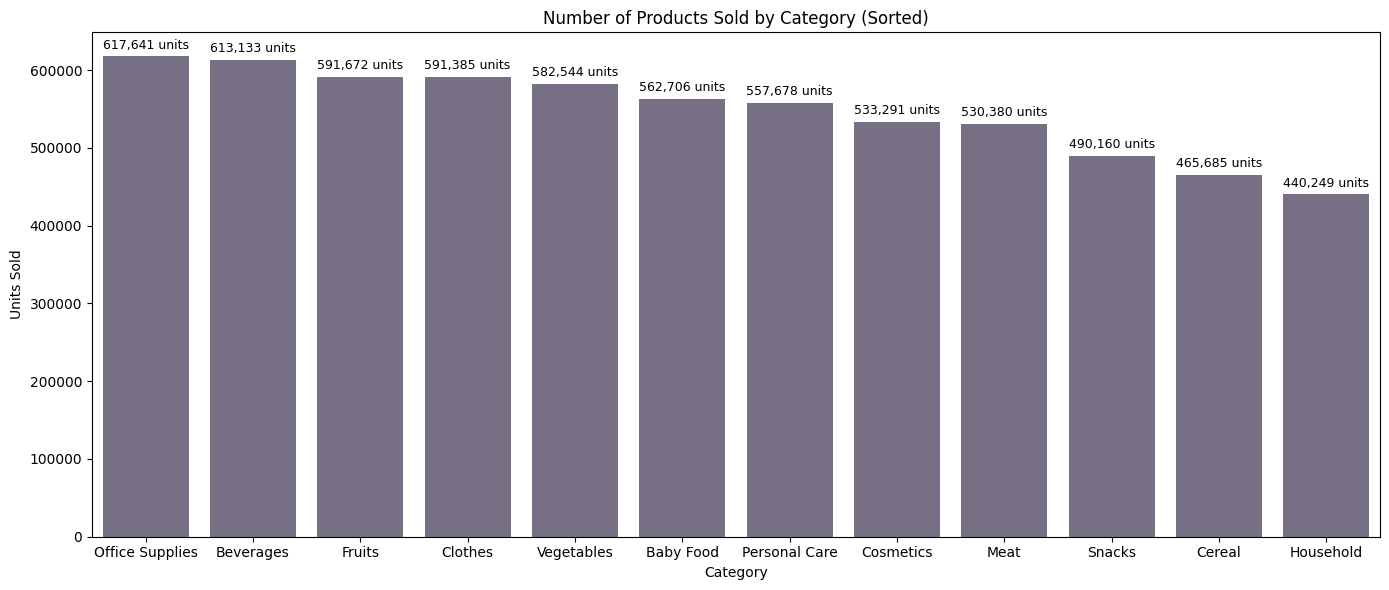

In [26]:
# Aggregate and sort total units sold per category
category_sales = (events_with_country.groupby("category", as_index=False)["units_sold"].sum().sort_values("units_sold", ascending=False))

# Create the figure and bar chart
plt.figure(figsize=(14, 6))
ax = sns.barplot(x="category", y="units_sold", data=category_sales, color="#766D88")

# Add value labels above each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,            # center of each bar
        height + max(category_sales["units_sold"]) * 0.01,  # slightly above the bar
        f'{int(height):,} units',                     # formatted label in one line
        ha='center',
        va='bottom',
        fontsize=9,
        color='black')

# Format chart
plt.title("Number of Products Sold by Category (Sorted)")
plt.xlabel("Category")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


This graph shows the distribution of the number of products sold by category. The distribution is more or less even.
The most products were sold in category "Office supplies" (617,614 units), the least in category "Household" (440,249 units)

## Сalculations by geography



   TOP 15 country by profit

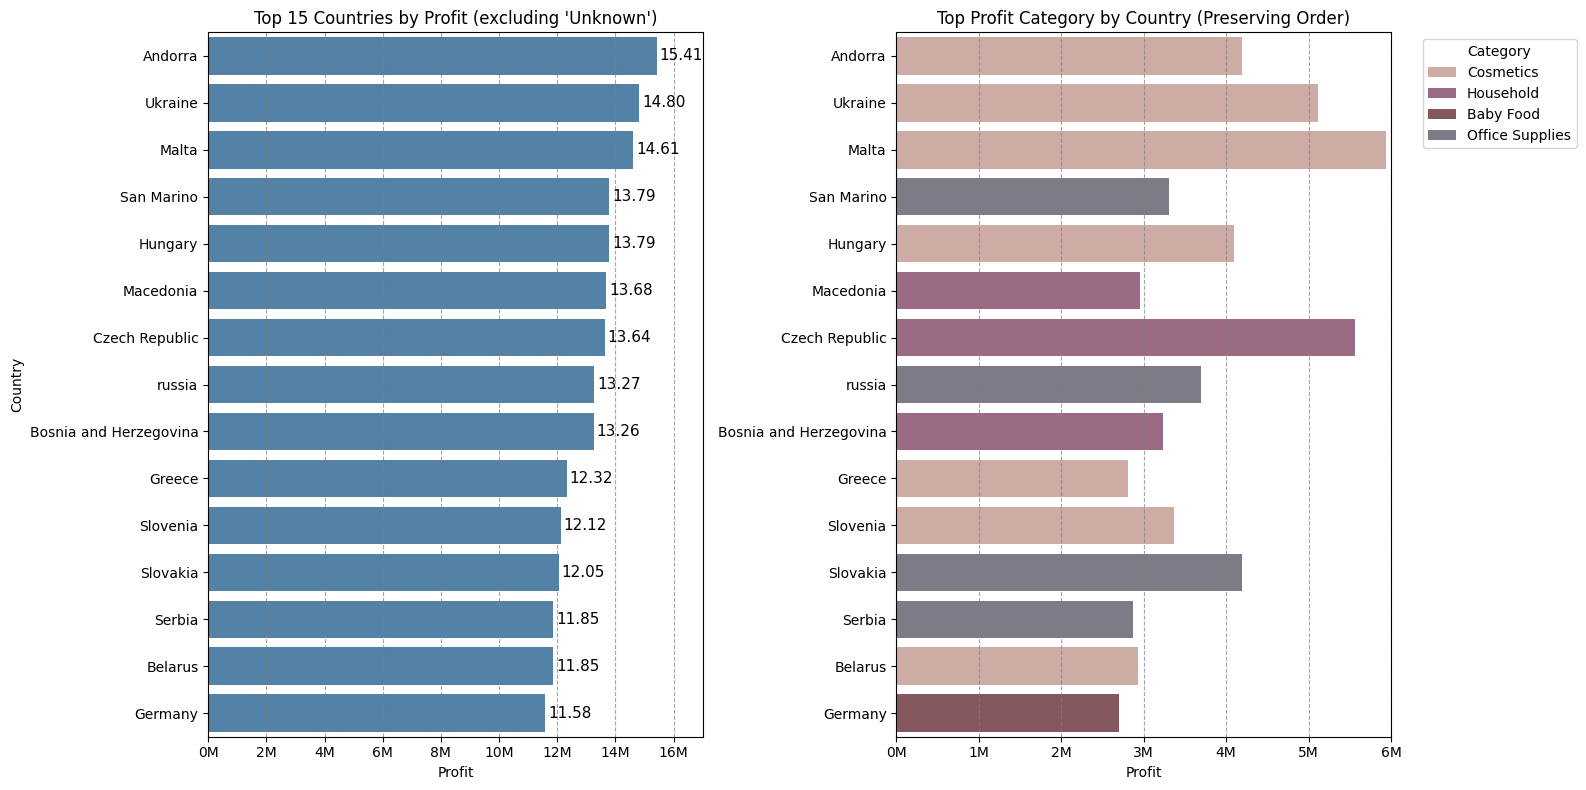

In [43]:
# Exclude 'Unknown'
filtered_df = events_with_country[events_with_country["country_name"] != "unknown"]

# Select top 15 countries by profit
top15 = (filtered_df.groupby("country_name")["profit"].sum().nlargest(15).reset_index())

# Preserve the order of countries
ordered_countries = top15["country_name"].tolist()

# Grouping by country and category for profit
top_countries = events_with_country[events_with_country['country_name'].isin(ordered_countries)]
grouped = (top_countries.groupby(['country_name', 'category'])['profit'].sum().reset_index())
top_category_per_country = (grouped.sort_values(['country_name', 'profit'], ascending=[True, False]).groupby('country_name').first().reset_index())

# Fix the order of countries
top_category_per_country['country_name'] = pd.Categorical(top_category_per_country['country_name'],categories=ordered_countries,ordered=True)


fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Left graph — total profit
for i, row in top15.iterrows():
    ax[0].text(row.profit + 100_000, i, f"{row.profit/1e6:.2f}", va='center', fontsize=11, color='black')

sns.barplot(x="profit", y="country_name", data=top15, color='steelblue', ax=ax[0])


ax[0].set_title("Top 15 Countries by Profit (excluding 'Unknown')")
ax[0].set_xlabel("Profit")
ax[0].set_ylabel("Country")
ax[0].grid(axis='x', linestyle='--', color='gray', alpha=0.7)
ax[0].set_xlim(0, 17_000_000)
ax[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))


# Right graph — category with the highest profit
sns.barplot(data=top_category_per_country,y='country_name',x='profit',hue='category',dodge=False, palette=['#D3A8A0', '#A36283','#8C505A', '#7D7888' ],ax=ax[1])
ax[1].set_title("Top Profit Category by Country (Preserving Order)")
ax[1].set_xlabel("Profit")
ax[1].set_ylabel("")
ax[1].grid(axis='x', linestyle='--', color='gray', alpha=0.7)
ax[1].set_xlim(0, 6_000_000)
ax[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

# Legend
ax[1].legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Distribution of revenue, cost and profits by region. The 3 most profitable countries are Andora ( 15.41M), Ukraine (14.8M) and Malta (14.61M). The second chart shows the most popular categories in the TOP 15 countries by profit.
It can be noted that in the top 3 leading countries in terms of revenue, the cosmetics category brings the most profit.

Distribution of revenue, cost and profit by subregions

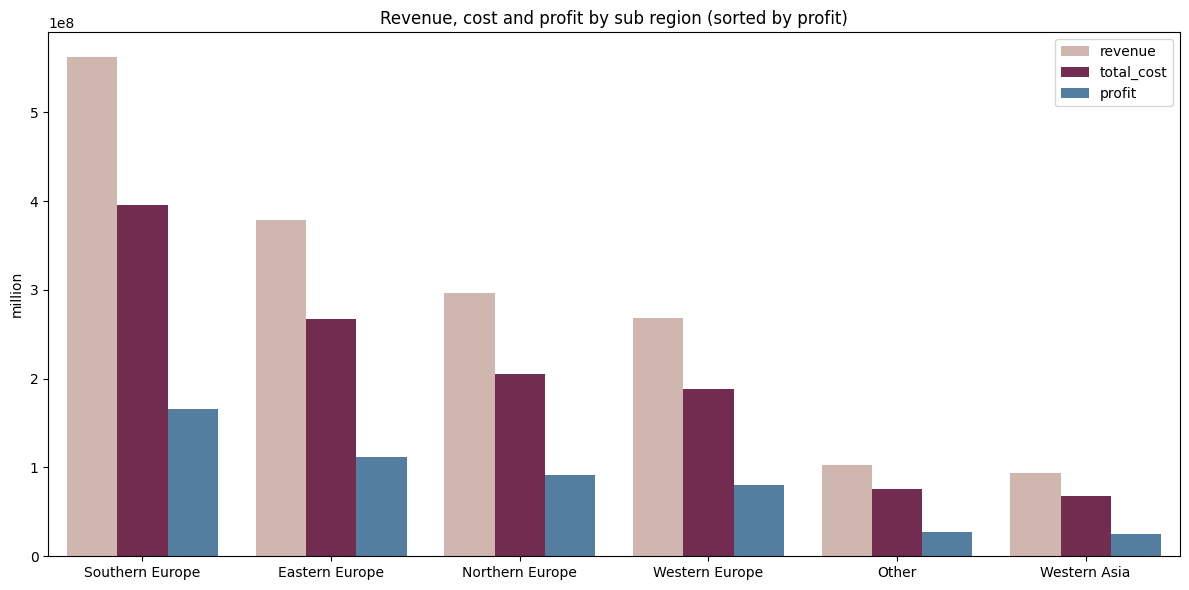

In [28]:
# Replace "unknown" with "other" in the Sub-region column
events_with_country["sub_region"] = events_with_country["sub_region"].replace("unknown", "Other")

# Aggregate by sub-regions
summary = (events_with_country.groupby('sub_region')[['revenue', 'total_cost', 'profit']].sum().reset_index().sort_values('profit', ascending=False))  # Sort by profit

# Transform to long format for seaborn
melted = summary.melt(id_vars='sub_region',value_vars=['revenue', 'total_cost', 'profit'],var_name='Metric',value_name='Value')


# Build the chart
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='sub_region', y='Value', hue='Metric', palette=['#d4b4ab', '#7C204F', '#4680AD'],order=summary['sub_region']) # Maintain sorted order

plt.title('Revenue, cost and profit by sub region (sorted by profit)')
plt.ylabel('million')
plt.xlabel('')
plt.legend(title='')
plt.tight_layout()
plt.show()


This graph shows the distribution by revenue, cost and profit by sub region: Southern Europe — the clear leader.
Highest revenue, cost, and profit.
A strong market with a large number of operations.
Eastern, Northern, and Western Europe — stable markets.
Generate significant profit.
Managed costs ensure high profitability.
Western Asia — the least profitable region.
Low revenue and costs → low financial impact.
Requires further analysis to assess growth potential.
Other (undefined countries):
Some data lacks geographical precision, but is retained because it contains a significant volume of profit-related information.

## Distribution of online \ offline sales

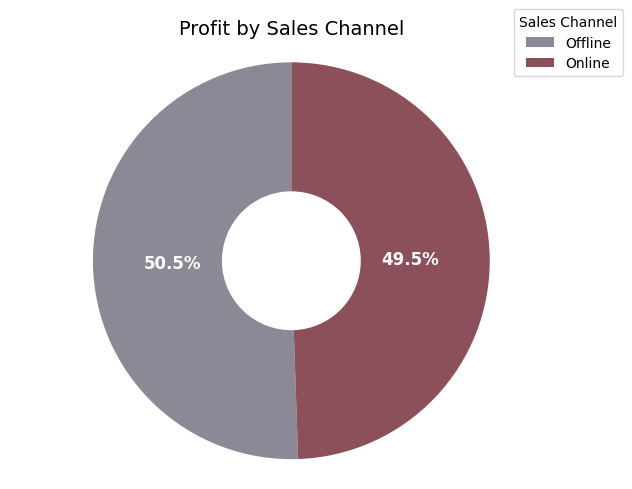

In [29]:

# Data
online_offline = events_with_country.groupby("sales_channel")["profit"].sum()
labels = online_offline.index

# Create the chart
fig, ax = plt.subplots(figsize=(6, 5))
ax.pie(online_offline.values, labels=labels, autopct='%1.1f%%', startangle=90, colors= ['#8D8895', "#8C505A"], wedgeprops=dict(width=0.65),textprops={'fontsize': 12, 'color': 'white', 'weight': 'bold'})

# Add legend
ax.legend(labels, title="Sales Channel", loc="center left", bbox_to_anchor=(1, 1))

ax.set_title("Profit by Sales Channel", fontsize=14)
ax.axis('equal')
plt.tight_layout()
plt.show()


The resulting graph clearly demonstrates that sales channels are divided almost equally by profit.

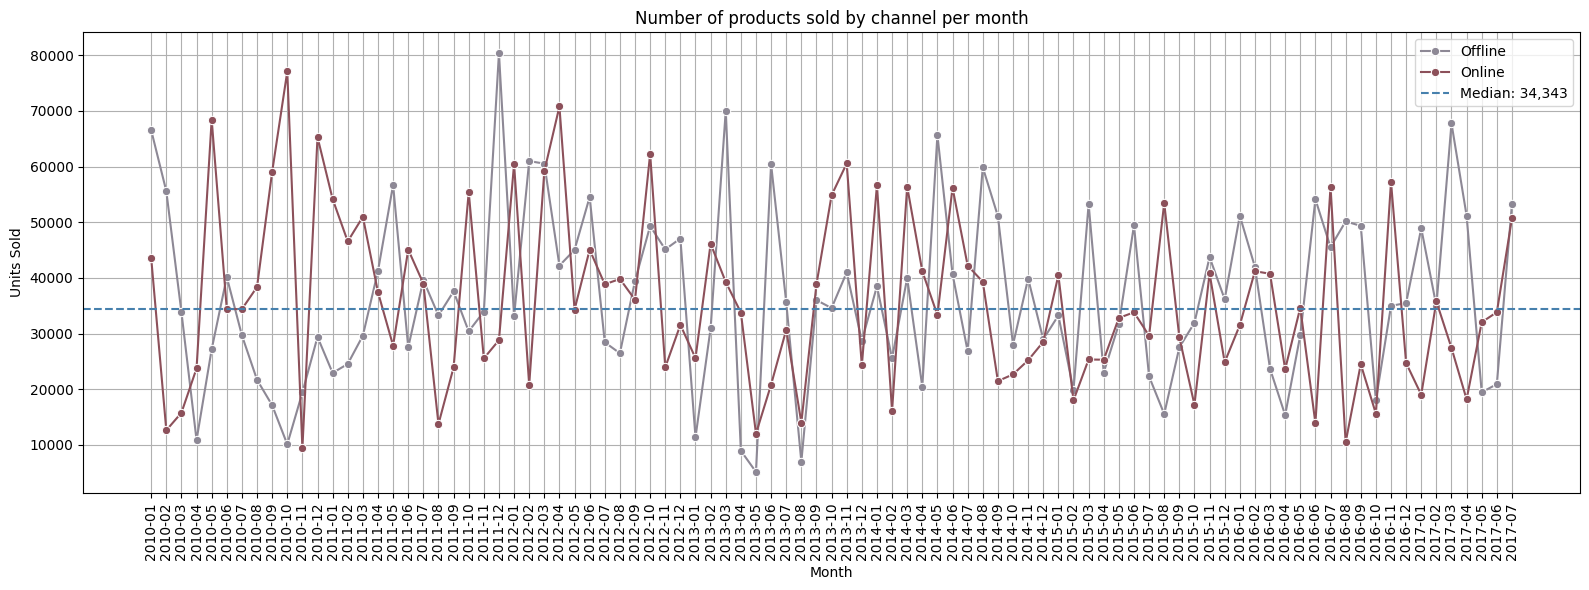

In [30]:
# Normalize sales_channel values (e.g., "online" → "Online")
events_with_country["sales_channel"] = events_with_country["sales_channel"].str.capitalize()

# Create 'order_month' column based on order date
events_with_country["order_month"] = pd.to_datetime(events_with_country["order_date"]).dt.to_period("M").astype(str)

# Group data by month and sales channel, then sum units sold
monthly_sales = (events_with_country.groupby(["order_month", "sales_channel"])["units_sold"].sum().reset_index())

# Calculate median of units sold
overall_median = monthly_sales["units_sold"].median()

# Plot line chart
plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly_sales, x="order_month", y="units_sold", hue="sales_channel", marker="o", palette=['#8D8895', '#8C505A'])

# Add median line
plt.axhline(y=overall_median, linestyle="--", color="#4680AD", linewidth=1.5, label=f'Median: {int(overall_median):,}')

# Formatting
plt.title("Number of products sold by channel per month")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Both channels (Online and Offline) show significant variability in the number of units sold from month to month.
At different periods, the advantage shifts between Offline and Online — there is no clear dominance of one channel throughout the entire period.
The median serves as a reference point to understand whether a campaign or month performed above or below the typical level.

## Dependence of profit on delivery

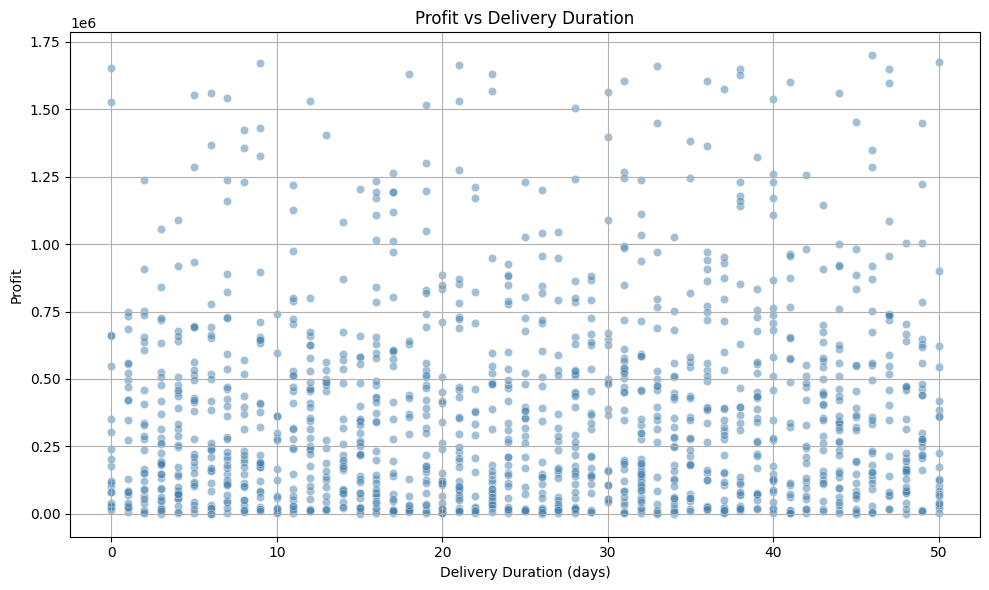

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=events_with_country, x='delivery_days', y='profit', alpha=0.5, color='#4680AD')

plt.title("Profit vs Delivery Duration")
plt.xlabel("Delivery Duration (days)")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

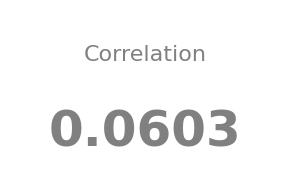

In [32]:
correlation = events_with_country[['delivery_days', 'profit']].corr().loc['delivery_days', 'profit'].round(4)

fig, ax = plt.subplots(figsize=(3, 2))
ax.text(0.5, 0.7, "Correlation", fontsize=16, color="gray", ha='center')
ax.text(0.5, 0.2, f"{correlation}", fontsize=36, weight='bold', color="gray", ha='center')
ax.axis('off')
plt.tight_layout()
plt.show()

The correlation coefficient and the graphs show that there is no dependence of income on the number of days of shipment at all.

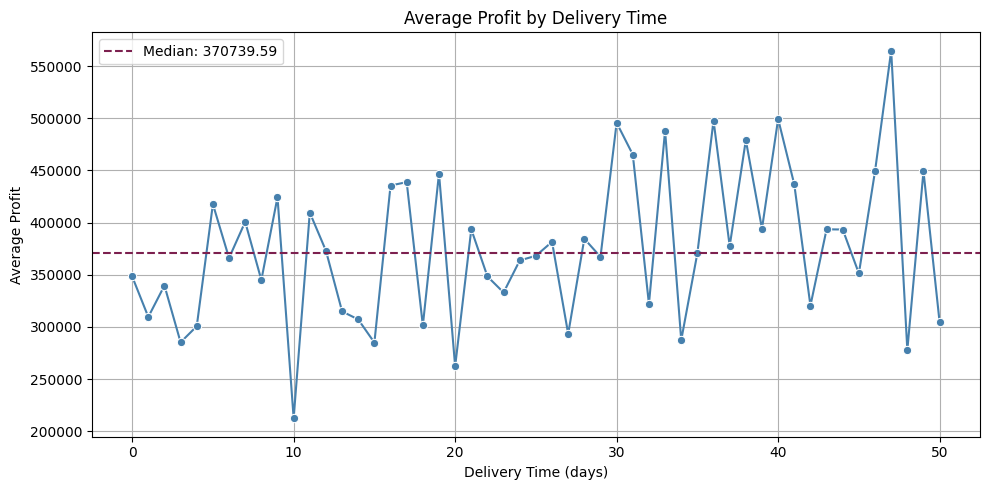

In [33]:
# Grouping: calculate average profit by number of delivery days
grouped = (events_with_country.groupby('delivery_days')['profit'].mean().reset_index())

# Calculate the median profit
median_profit = grouped['profit'].median()

# Plot the chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped, x='delivery_days', y='profit', marker='o', color='#4680AD')

# Add median line
plt.axhline(y=median_profit, linestyle='--', color='#7C204F', label=f'Median: {median_profit:.2f}')

# Styling
plt.title("Average Profit by Delivery Time")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Average Profit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Key observations:

Lack of a clear trend: There is no evident increase or decrease in average profit as delivery time increases.

Significant fluctuations: Average profit shows sharp peaks and drops at various delivery time intervals. For example, there are points with very low profit (around 210,000) and very high profit (over 560,000).

Low profit at certain delivery times: Some delivery periods consistently show relatively low average profit (e.g., around 8–10 days and 19–21 days).

High profit at certain delivery times: There are also delivery periods with high average profit (e.g., around 30 days and 47 days).

Median value: The median indicates the typical level of average profit, but the wide fluctuations around this value suggest instability.

Delivery dependency on order priority

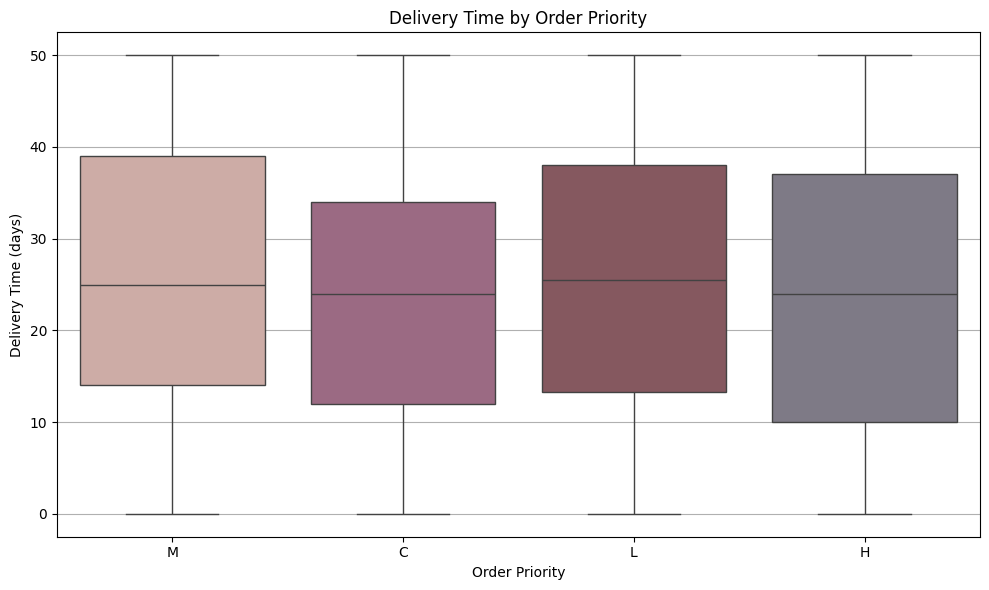

In [44]:
# Create a new figure with specified size
plt.figure(figsize=(10, 6))

# Create a boxplot showing delivery days by order priority
sns.boxplot(
    data=events_with_country,
    x='order_priority',
    y='delivery_days',
    hue='order_priority',
    palette=['#D3A8A0', '#A36283', '#8C505A', '#7D7888'],
    legend=False
)

# Add a title to the plot
plt.title('Delivery Time by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Delivery Time (days)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

The constructed graph demonstrates that there is no dependency between order priority and shipping. Each priority shows approximately the same indicators.

## Sales dynamics

 by region

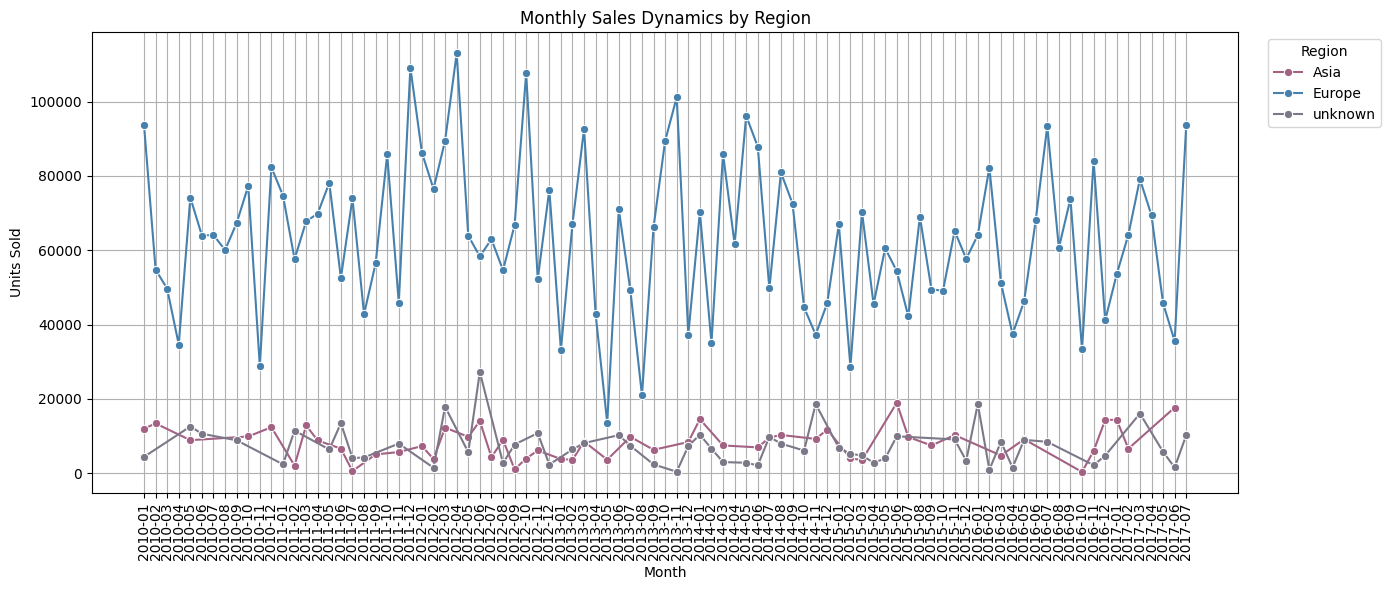

In [35]:
# Group data by month and region, then sum the units sold
monthly_region_sales = (events_with_country.groupby(['order_month', 'region'])['units_sold'].sum().reset_index())

# Create a new figure with specified size
plt.figure(figsize=(14, 6))

# Plot a line chart showing units sold by region over time
sns.lineplot(data=monthly_region_sales, x='order_month', y='units_sold', hue='region', marker='o', palette=['#A36283', '#4680AD', '#7D7888'])

# Add a title to the plot
plt.title("Monthly Sales Dynamics by Region")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title="Region", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


The line graph shows a more or less even distribution of sales over almost seven years in Europe and Asia. There is also sales data where the country was not identified, they are shown by the line - unknown

Sales dynamics by category

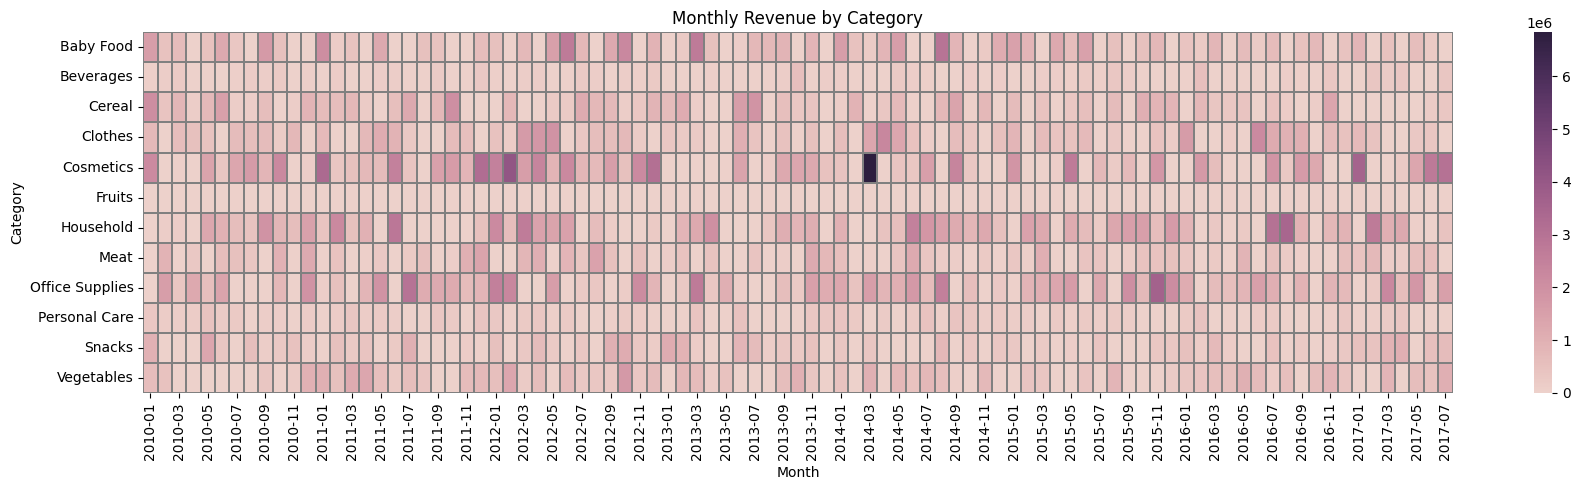

In [36]:
# Create a pivot table: sum of profit by category and order month
pivot = events_with_country.pivot_table(index='category', columns='order_month', values='profit', aggfunc='sum', fill_value=0)

# Define a color palette for the heatmap
cube_palette = sns.cubehelix_palette(as_cmap=True)

# Create a new figure with specified size
plt.figure(figsize=(18, 5))

# Plot the heatmap
sns.heatmap(
pivot, cmap=cube_palette, linewidths=0.1, linecolor='gray', annot=False, fmt=".0f")
plt.title("Monthly Revenue by Category")
plt.xlabel("Month")
plt.ylabel("Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The resulting heat map shows a more or less even distribution, except for one case in the cosmetics category. Let's look at it in more detail in the following graph.

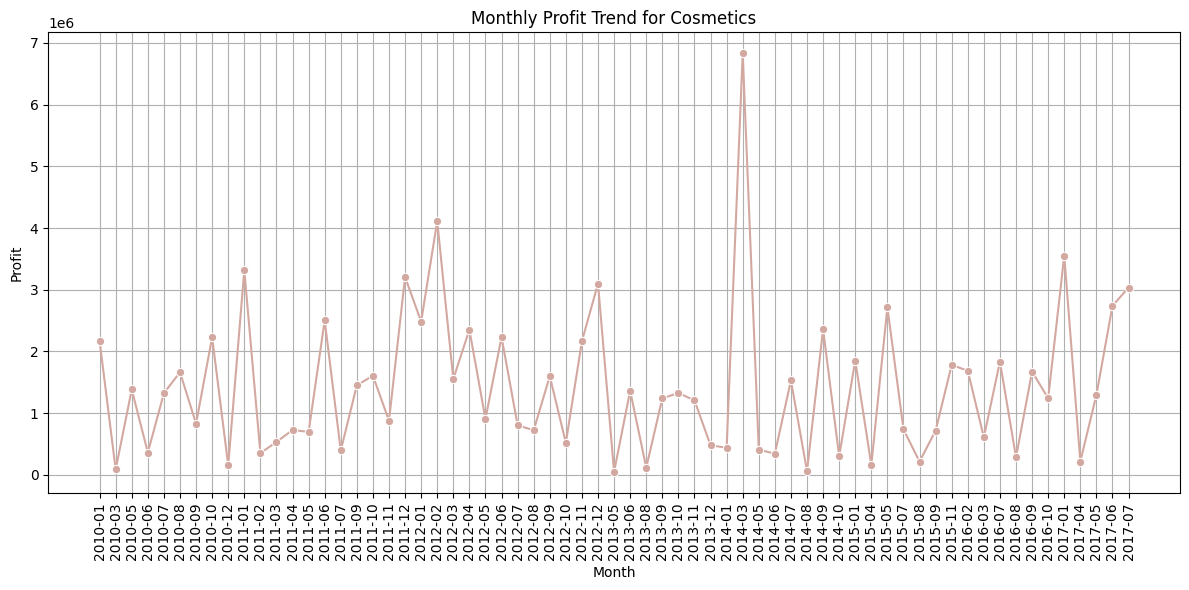

In [37]:
# Filter the data to include only the 'Cosmetics' category
# Then group by order month and sum the profit
cosmetics_monthly = (events_with_country[events_with_country['category'] == 'Cosmetics'].groupby('order_month')['profit'].sum().reset_index())

# Create a new figure with specified size
plt.figure(figsize=(12, 6))

# Plot a line chart for monthly profit in the Cosmetics category
sns.lineplot(data=cosmetics_monthly, x='order_month', y='profit', marker='o',  color='#D3A8A0')

plt.title("Monthly Profit Trend for Cosmetics")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


On the linear graph, we observe an abnormally high indicator in March 2014. It is necessary to check and clarify this data for compliance, in order to build further forecasts and hypotheses.

Sales dynamics by country

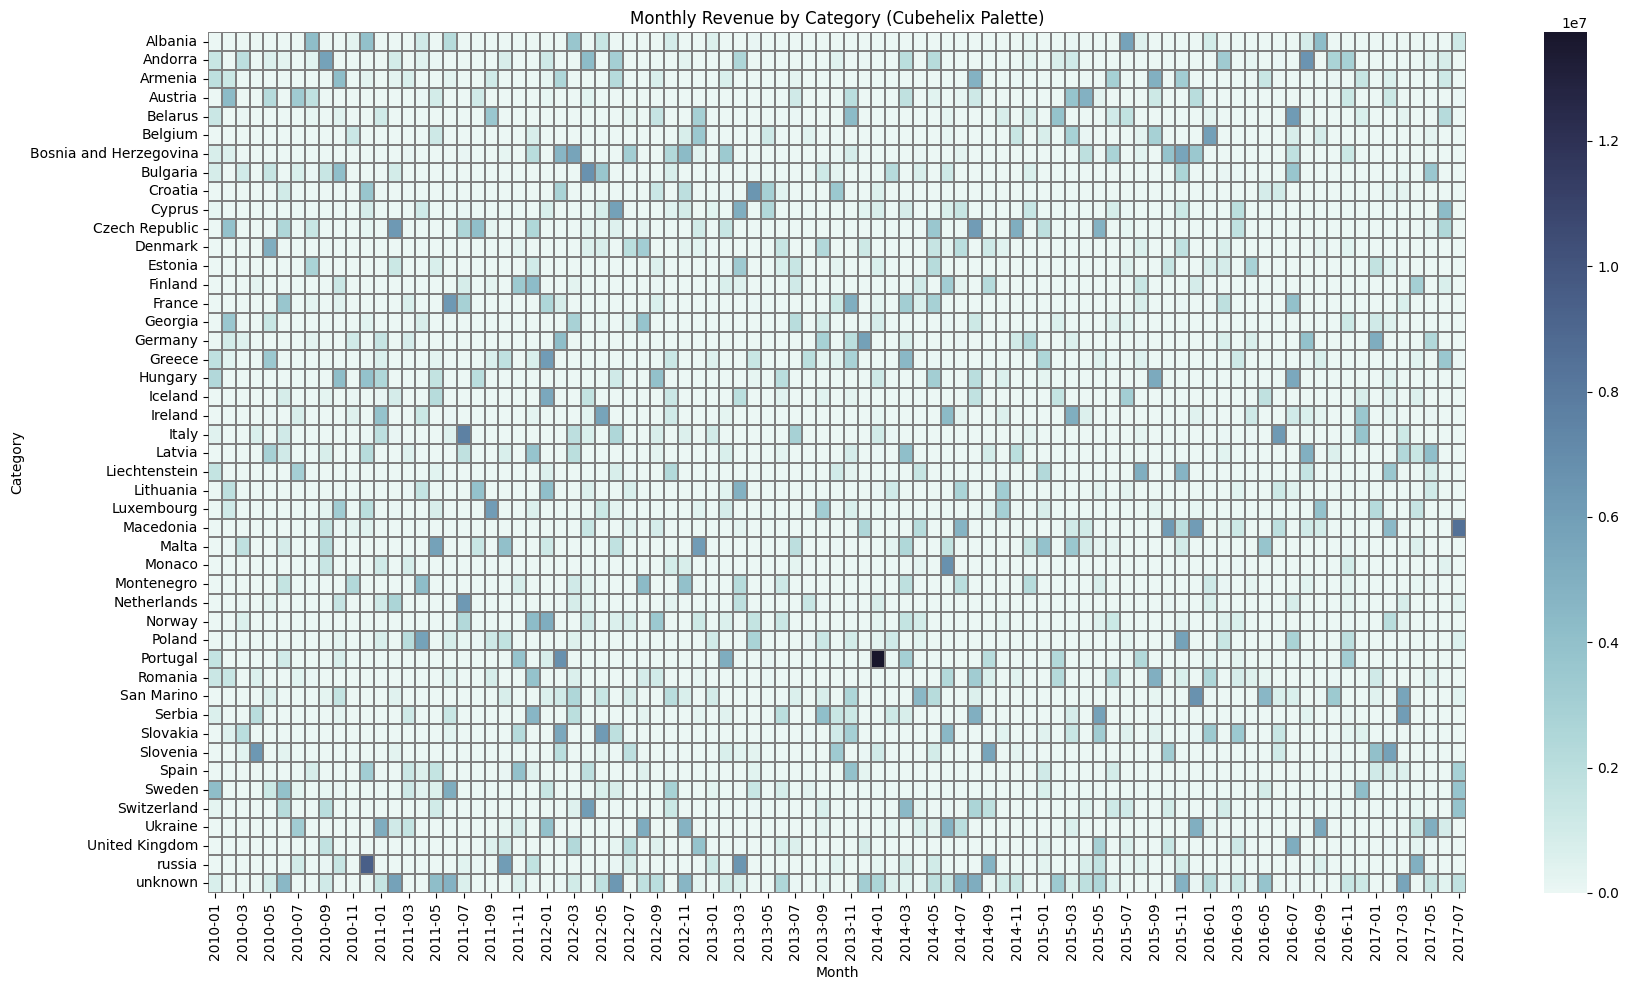

In [38]:
# Create a pivot table: sum of revenue by country and month
pivot = events_with_country.pivot_table(index='country_name', columns='order_month', values='revenue', aggfunc='sum', fill_value=0)

# Create a color palette as a colormap
cube_palette = sns.cubehelix_palette(start=0.1, rot=-0.27, light=0.95, dark=0.1, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(pivot, cmap=cube_palette, linewidths=0.3, linecolor='gray', annot=False, fmt=".0f")

plt.title("Monthly Revenue by Category (Cubehelix Palette)")
plt.xlabel("Month")
plt.ylabel("Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In this heat map we see a spike in value in Portugal, let's look at it in more detail in the line graph below

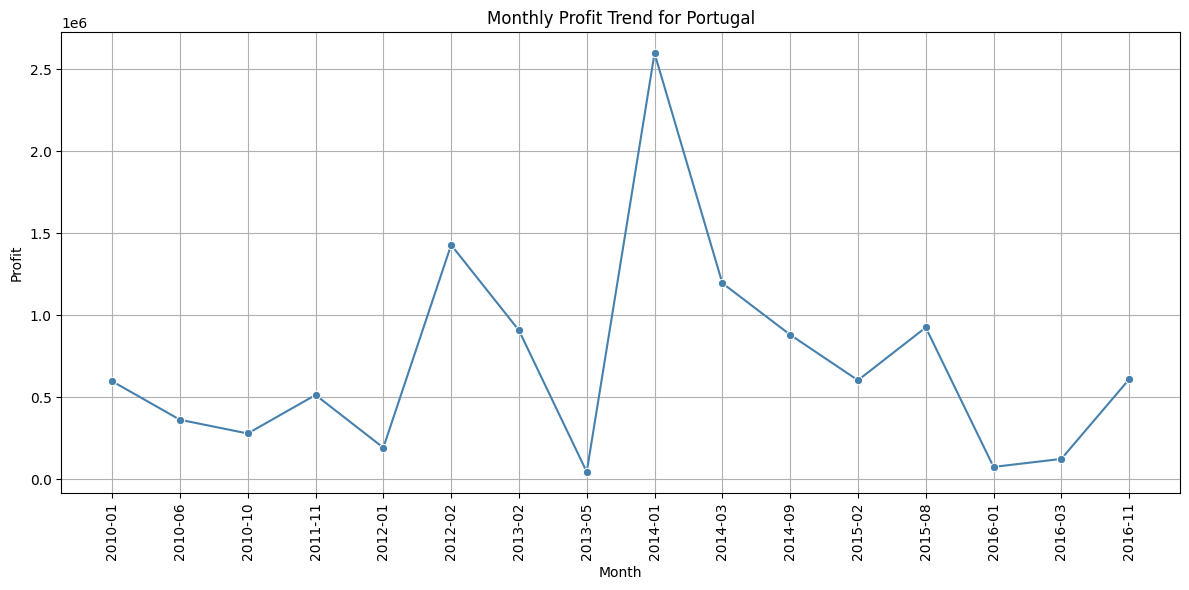

In [39]:
# Filter the data to include only the 'Portugal' country_name
# Then group by order month and sum the profit
portugal_monthly = (events_with_country[events_with_country['country_name'] == 'Portugal'].groupby('order_month')['profit'].sum().reset_index())

# Create a new figure with specified size
plt.figure(figsize=(12, 6))

sns.lineplot(data=portugal_monthly, x='order_month', y='profit', marker='o', color='#4680AD')
plt.title("Monthly Profit Trend for Portugal")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

This graph shows that the yields in Portugal are volatile, with several pronounced peaks and troughs.

It is worth examining January 2014 and the period after it in more detail - perhaps changes in marketing or pricing strategy.

To better understand the dynamics, it is recommended to compare this trend with other countries or with the average for the region.

# Distribution of profits by month of the year by category and by day of the week.

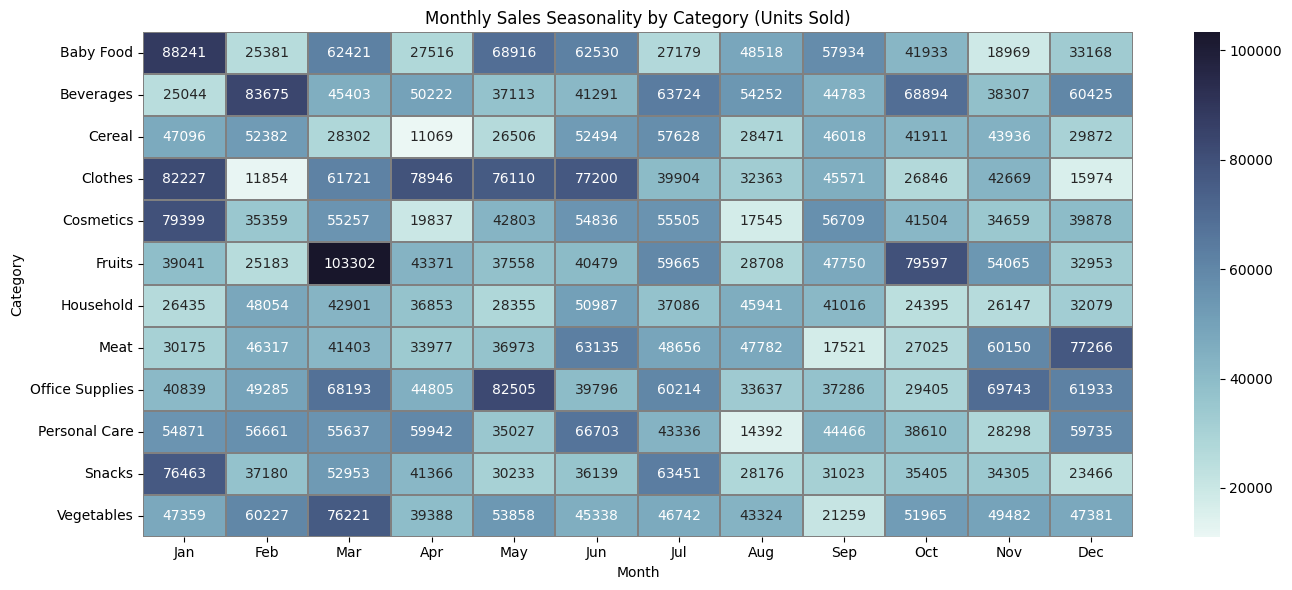

In [40]:
# Extract order_month
events_with_country['order_month_name'] = pd.to_datetime(events_with_country['order_month']).dt.strftime('%b')
events_with_country['order_month_num'] = pd.to_datetime(events_with_country['order_month']).dt.month

# Group by category and month, summing units sold
monthly_units_by_category = (events_with_country.groupby(['category', 'order_month_num', 'order_month_name'])['units_sold'].sum().reset_index())

# Pivot for heatmap
units_heatmap = monthly_units_by_category.pivot_table( index='category', columns='order_month_num', values='units_sold', fill_value=0)

# Rename columns to month short names
month_short_names = (events_with_country[['order_month_num', 'order_month_name']].drop_duplicates().sort_values('order_month_num').set_index('order_month_num')['order_month_name'].to_dict())
units_heatmap.columns = [month_short_names[col] for col in units_heatmap.columns]

# Plot heatmap
plt.figure(figsize=(14, 6))

# Create a color palette as a colormap
cube_palette = sns.cubehelix_palette(start=0.1, rot=-0.27, light=0.95, dark=0.1, as_cmap=True)

sns.heatmap(units_heatmap, cmap=cube_palette, linewidths=0.3, linecolor='gray', annot=True, fmt=".0f")

plt.title("Monthly Sales Seasonality by Category (Units Sold)")
plt.xlabel("Month")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

Clear seasonal patterns have been identified for many product categories. This can be used for inventory planning, marketing campaigns, and workforce management.
The "Fruits" category shows a pronounced sales peak in March, which requires further investigation to understand the reasons behind this anomaly.
Some categories, such as "Baby Food" and "Personal Care", demonstrate relatively stable sales throughout the year.
Low sales in certain months may be related to decreased demand, production seasonality, or other factors that should be analyzed.

Analysis of product sales by day of the week.

Text(0, 0.5, 'Units Sold')

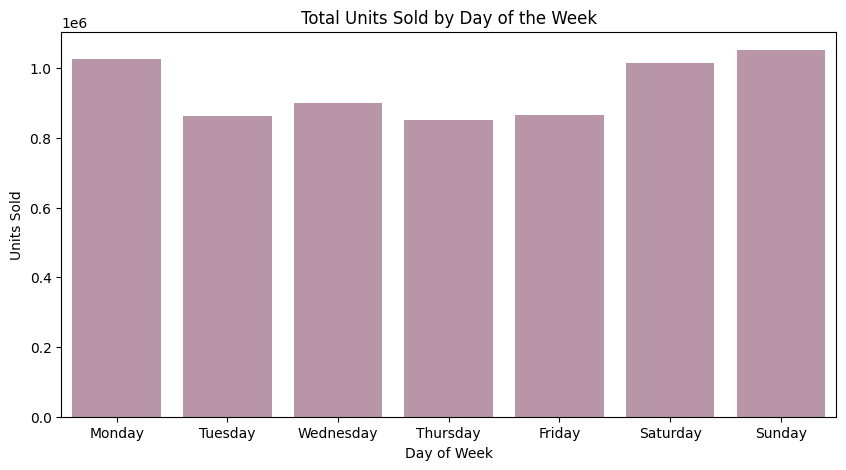

In [41]:
# Create a new column with the name of the day from the order date
events_with_country['day_of_week'] = events_with_country['order_date'].dt.day_name()

# Group by day of the week, sum the units sold, and ensure correct weekday order
sales_by_day = (events_with_country.groupby('day_of_week')['units_sold'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index())

# Create the figure
plt.figure(figsize=(10, 5))

# Plot a bar chart for units sold by day of the week
sns.barplot( data=sales_by_day, x='day_of_week', y='units_sold', color='#A36283', alpha=0.7)

# Add chart title and axis labels
plt.title("Total Units Sold by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Units Sold")


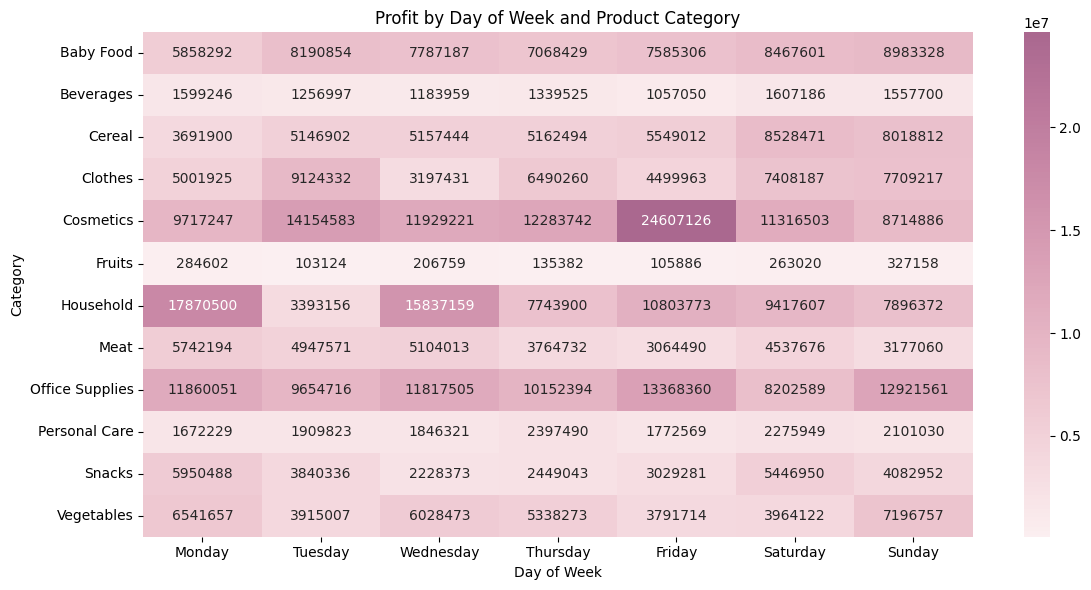

In [42]:
# Define the correct order of days in the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by category and day of the week, summing the profit
weekly_profit = ( events_with_country.groupby(['category', 'day_of_week'])['profit'].sum().reset_index())

# Ensure the day_of_week column follows the correct weekday order
weekly_profit['day_of_week'] = pd.Categorical( weekly_profit['day_of_week'], categories=day_order, ordered=True)

# Pivot the data to have days as columns and categories as rows
pivot = weekly_profit.pivot(index='category', columns='day_of_week', values='profit').fillna(0)

# Create a colormap using cubehelix palette
cube_palette = sns.cubehelix_palette(start=0.3, rot=0.2, light=0.95, dark=0.5, as_cmap=True)

# Create the figure
plt.figure(figsize=(12, 6))

# Plot the heatmap of profit by category and day of the week
sns.heatmap(pivot, cmap=cube_palette, annot=True, fmt='.0f')

# Add title and axis labels
plt.title('Profit by Day of Week and Product Category')
plt.xlabel('Day of Week')
plt.ylabel('Category')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the heatmap
plt.show()

The bar chart by day of the week and the heatmap of profit distribution by category show that it's difficult to identify any specific days with clear patterns. This is likely because the sales we are analyzing are wholesale transactions, and the dates when deals are made are probably not tied to specific days of the week. However, in that case, it is quite surprising that we observe activity on weekends at a level comparable to, or even slightly higher than, weekdays.

# Conclusions:

## 1. Preliminary Data Overview

The project is based on three main tables:

events_df — 1330 rows, 10 columns, contains sales data:

Order ID — order identifier

Order Date — order date

Delivery Date — delivery date

Order Priority — order priority

Country Code — country code

Product ID — product identifier

Sales Channel — sales channel (online/offline)

Units Sold — quantity sold

Unit Price — unit price

Unit Cost — unit cost

All numeric fields were correctly recognized, but date fields had the wrong format. Missing values were found in the Country Code column.

countries_df — 249 rows, 5 columns:
Contains country names, codes (alpha-2, alpha-3), regions, and subregions. Each of the columns alpha-2, region, and sub-region had one missing value, which were removed as insignificant.

products_df — 147 rows, 3 columns:
Product ID, Product Name, Category.

# 2. Data Cleaning

To ensure data quality and correctness of analysis, several preprocessing steps were performed:

Data types:

Converted date columns (Order Date, Delivery Date) to datetime format, enabling the extraction of months, weekdays, etc.

New columns:

Created fields like order_month, day_of_week, delivery_days, order_month_name for aggregation and visualization.

Missing values:

Missing values in Country Code were removed as insignificant.

Table joins:

Merged events_df, countries_df, and products_df to enrich data with geographic and product details.

Text normalization:

Standardized product categories and sales channels (e.g., Online, Offline).

Removed extra spaces and unified text case.

Duplicates:

No duplicates were found.

#3. Data Analysis and Visualization

##3.1 Basic Metrics

Total Revenue: $1,702,129,408

Total Cost: $1,200,694,949

Total Profit: $501,434,459

ROI: 41.76%

Number of countries: 45

Total Units Sold: 6,576,524

These KPIs reflect a strong business scale and efficiency.

##3.2 Category-Based Analysis

Top-profit categories: Cosmetics, Clothes, Household

Lowest margin categories: Meat (13.56%), Office Supplies (19.39%)

Highest margin products: Clothes (67.2%), Cereal (43.7%), Vegetables (40.9%)

Highest units sold: Office Supplies

This analysis helps prioritize assortment and pricing strategy.

##3.3 Geographic Analysis

Top 15 countries by profit:

Highest: Andorra ($15.41M), Ukraine ($14.80M), Malta ($14.61M), San Marino ($13.79M)

Dominant categories vary per country: Cosmetics, Household, or Baby Food

Regional analysis:

Top regions: Southern, Eastern, and Northern Europe

Underperforming: Other, Western Asia

Insights:

Localize assortment per country

Focus on high-potential regions

Clean up "unknown" countries in data

##3.4 Online vs Offline Sales

Offline: 50.5% profit | Online: 49.5% profit

Balanced performance across channels

Monthly sales trend:

High variability in both channels

Median monthly units: ~34,343

Insights:

Maintain both channels

Adjust inventory dynamically

##3.5 Profit vs Delivery Duration

Correlation: 0.0603 (very weak)

High profit appears at all delivery durations

Median average profit consistent across durations

Insights:

Delivery speed has little impact on profit

Other factors (category, region) matter more

Order Priority Impact:

No significant difference in delivery duration by priority (H, C, M, L)

Suggests disconnect between order intent and logistics

##3.6 Time-Based Dynamics

Europe dominates monthly sales (4–5x higher than Asia)

Cosmetics peaked in March 2014 ($6.9M)

Portugal profit spike in Jan 2014, then stabilized

Insights:

Europe needs marketing/logistics priority

2014 peaks worth investigating

Anomalies could reveal replicable success

##3.7 Monthly & Weekly Profit Distribution

Seasonality:

Peak months:

Fruits: March (103,302 units)

Baby Food: January (88,241 units)

Office Supplies: May (82,505 units)

Weekday Sales:

Evenly distributed, which is unusual for wholesale

Highest sales on Sunday, Monday, and Saturday

Weekly Profit by Category:

Cosmetics: peak on Friday ($24.6M)

Office Supplies: peak on Sunday ($12.9M)

Household: peak on Monday ($17.8M)

Insights:

Plan inventory for seasonal categories

Investigate high weekend activity in wholesale

Prioritize high-margin, stable categories for campaigns

**Final Summary**

The company demonstrates consistently high sales volumes and profitability, with particularly strong performance in Europe and in categories such as Cosmetics, Baby Food, and Office Supplies. Both online and offline sales channels perform almost equally effectively, while seasonality and day-of-week dynamics have only a limited impact on overall financial outcomes. Overall, the business is well-balanced, scalable, and holds strong growth potential through localized product strategies and supply chain optimization.
